In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
plt.rcParams['figure.figsize']=(20,20)

In [3]:
df = pd.read_csv(r'C:\Users\ASUS\Downloads\Black Friday Sales.csv')

In [4]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
df.shape

(550068, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

# Treating null values

In [9]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

0          9.842329
1          6.000000
2          9.842329
3         14.000000
4          9.842329
            ...    
550063     9.842329
550064     9.842329
550065     9.842329
550066     9.842329
550067     9.842329
Name: Product_Category_2, Length: 550068, dtype: float64

In [11]:
df['Product_Category_2'].fillna(df['Product_Category_2'].median(),inplace = True)

In [12]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
df['Product_Category_3'].fillna(df['Product_Category_3'].median())

0         14.0
1         14.0
2         14.0
3         14.0
4         14.0
          ... 
550063    14.0
550064    14.0
550065    14.0
550066    14.0
550067    14.0
Name: Product_Category_3, Length: 550068, dtype: float64

In [14]:
df['Product_Category_3'].fillna(df['Product_Category_3'].median(),inplace = True)

In [15]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [16]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,14.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.0,14.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.0,14.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.0,14.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.0,14.0,365


In [17]:
df.drop('User_ID',axis=1,inplace=True)

In [18]:
df.drop('Product_ID',axis=1,inplace=True)

In [19]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.0,14.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,9.0,14.0,1422
3,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,14.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.0,14.0,368
550064,F,26-35,1,C,3,0,20,9.0,14.0,371
550065,F,26-35,15,B,4+,1,20,9.0,14.0,137
550066,F,55+,1,C,2,0,20,9.0,14.0,365


In [20]:
df['Purchase'] = df['Purchase'].astype(str)

In [21]:
print(df['Purchase'].value_counts())

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64


In [22]:
df['Purchase'].describe()

count     550068
unique     18105
top         7011
freq         191
Name: Purchase, dtype: object

<Figure size 3000x3000 with 0 Axes>

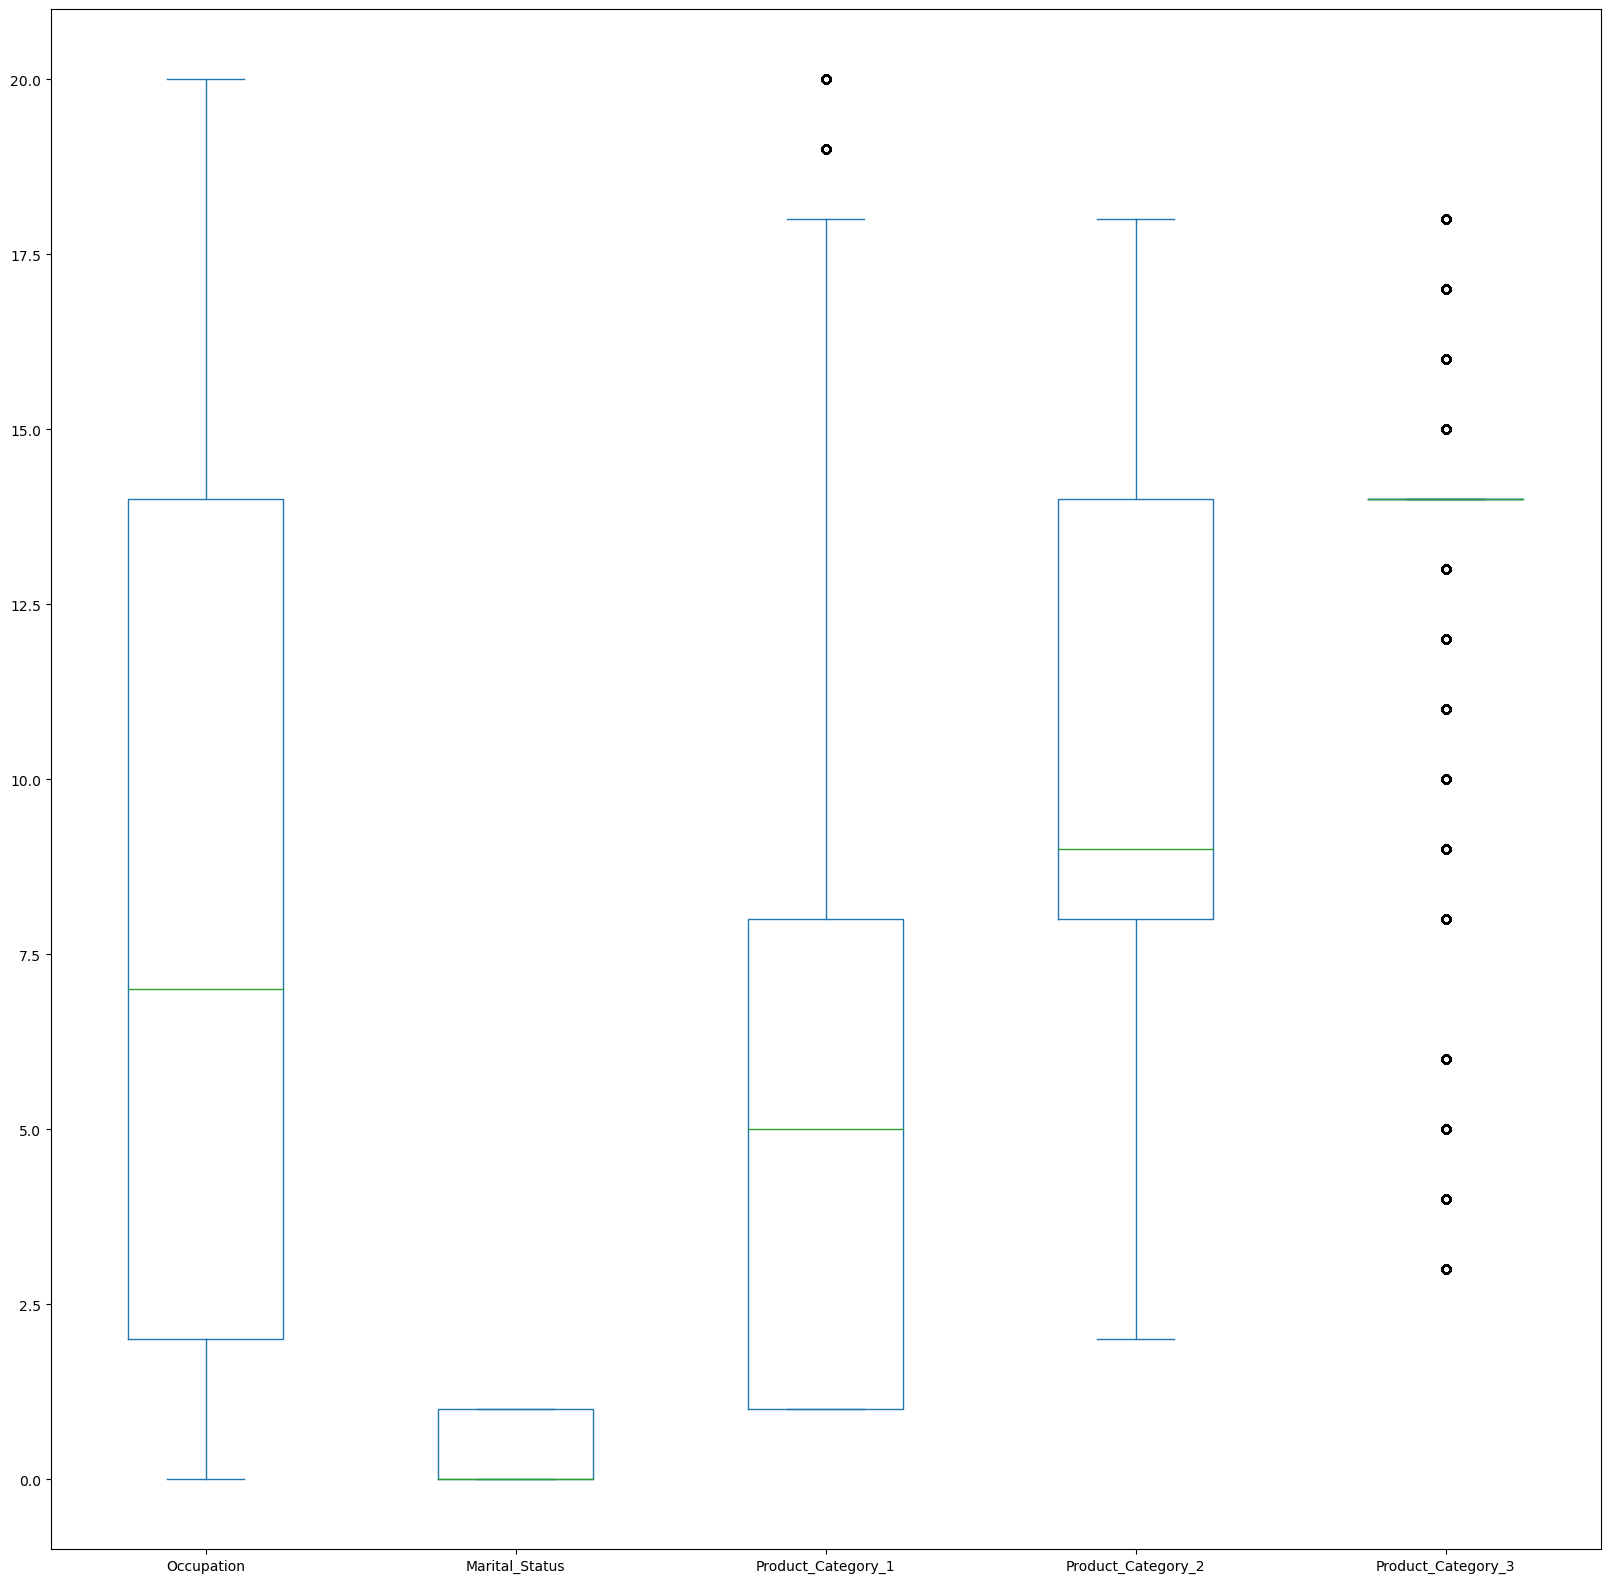

In [23]:
plt.figure(figsize=(30,30))
df.plot(kind='box')
plt.show()

<AxesSubplot:>

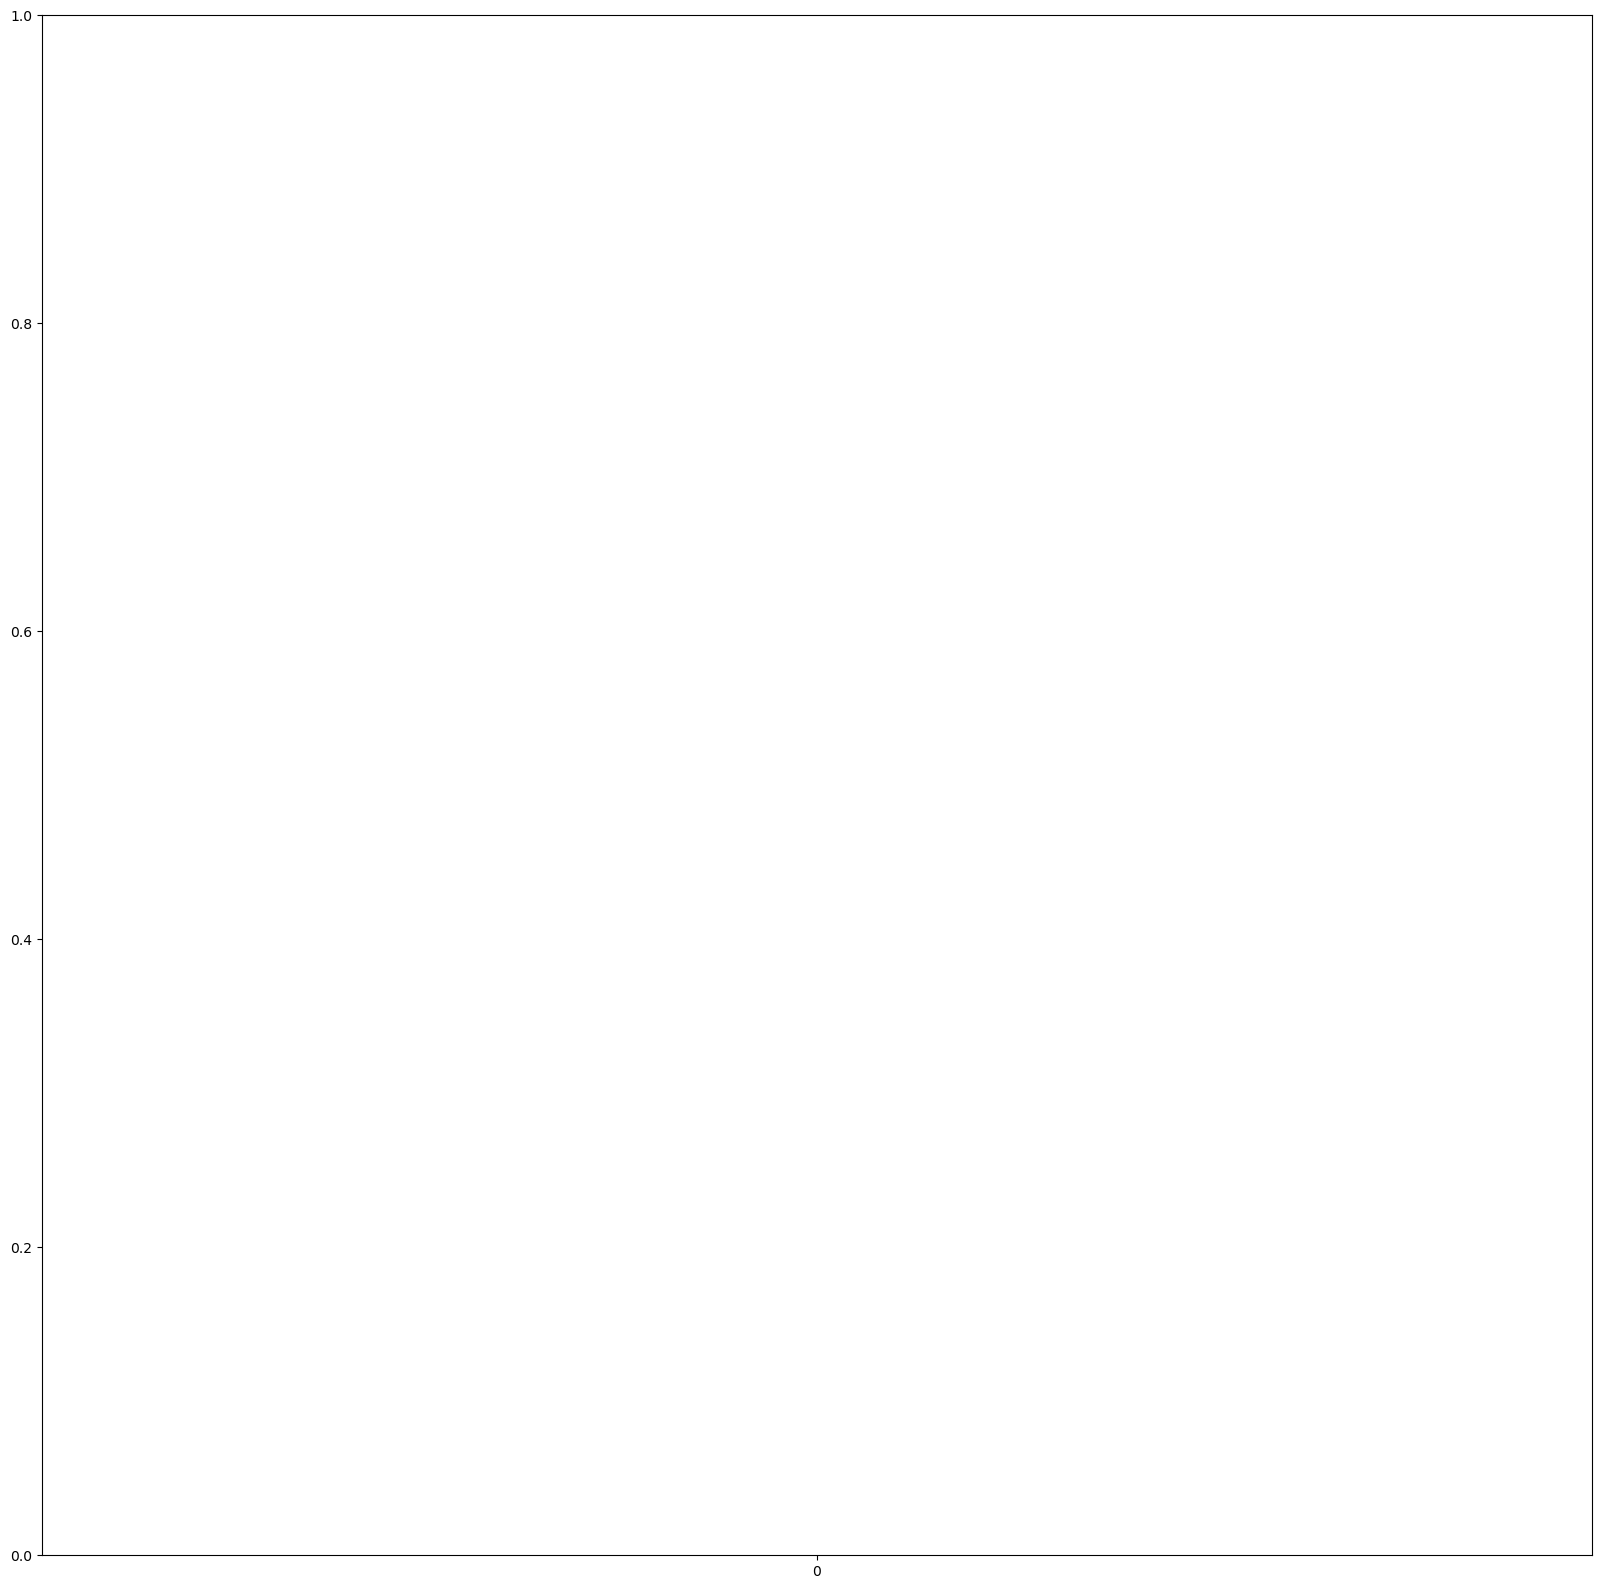

In [24]:
sns.boxplot(Data=df['Product_Category_3'])

<AxesSubplot:>

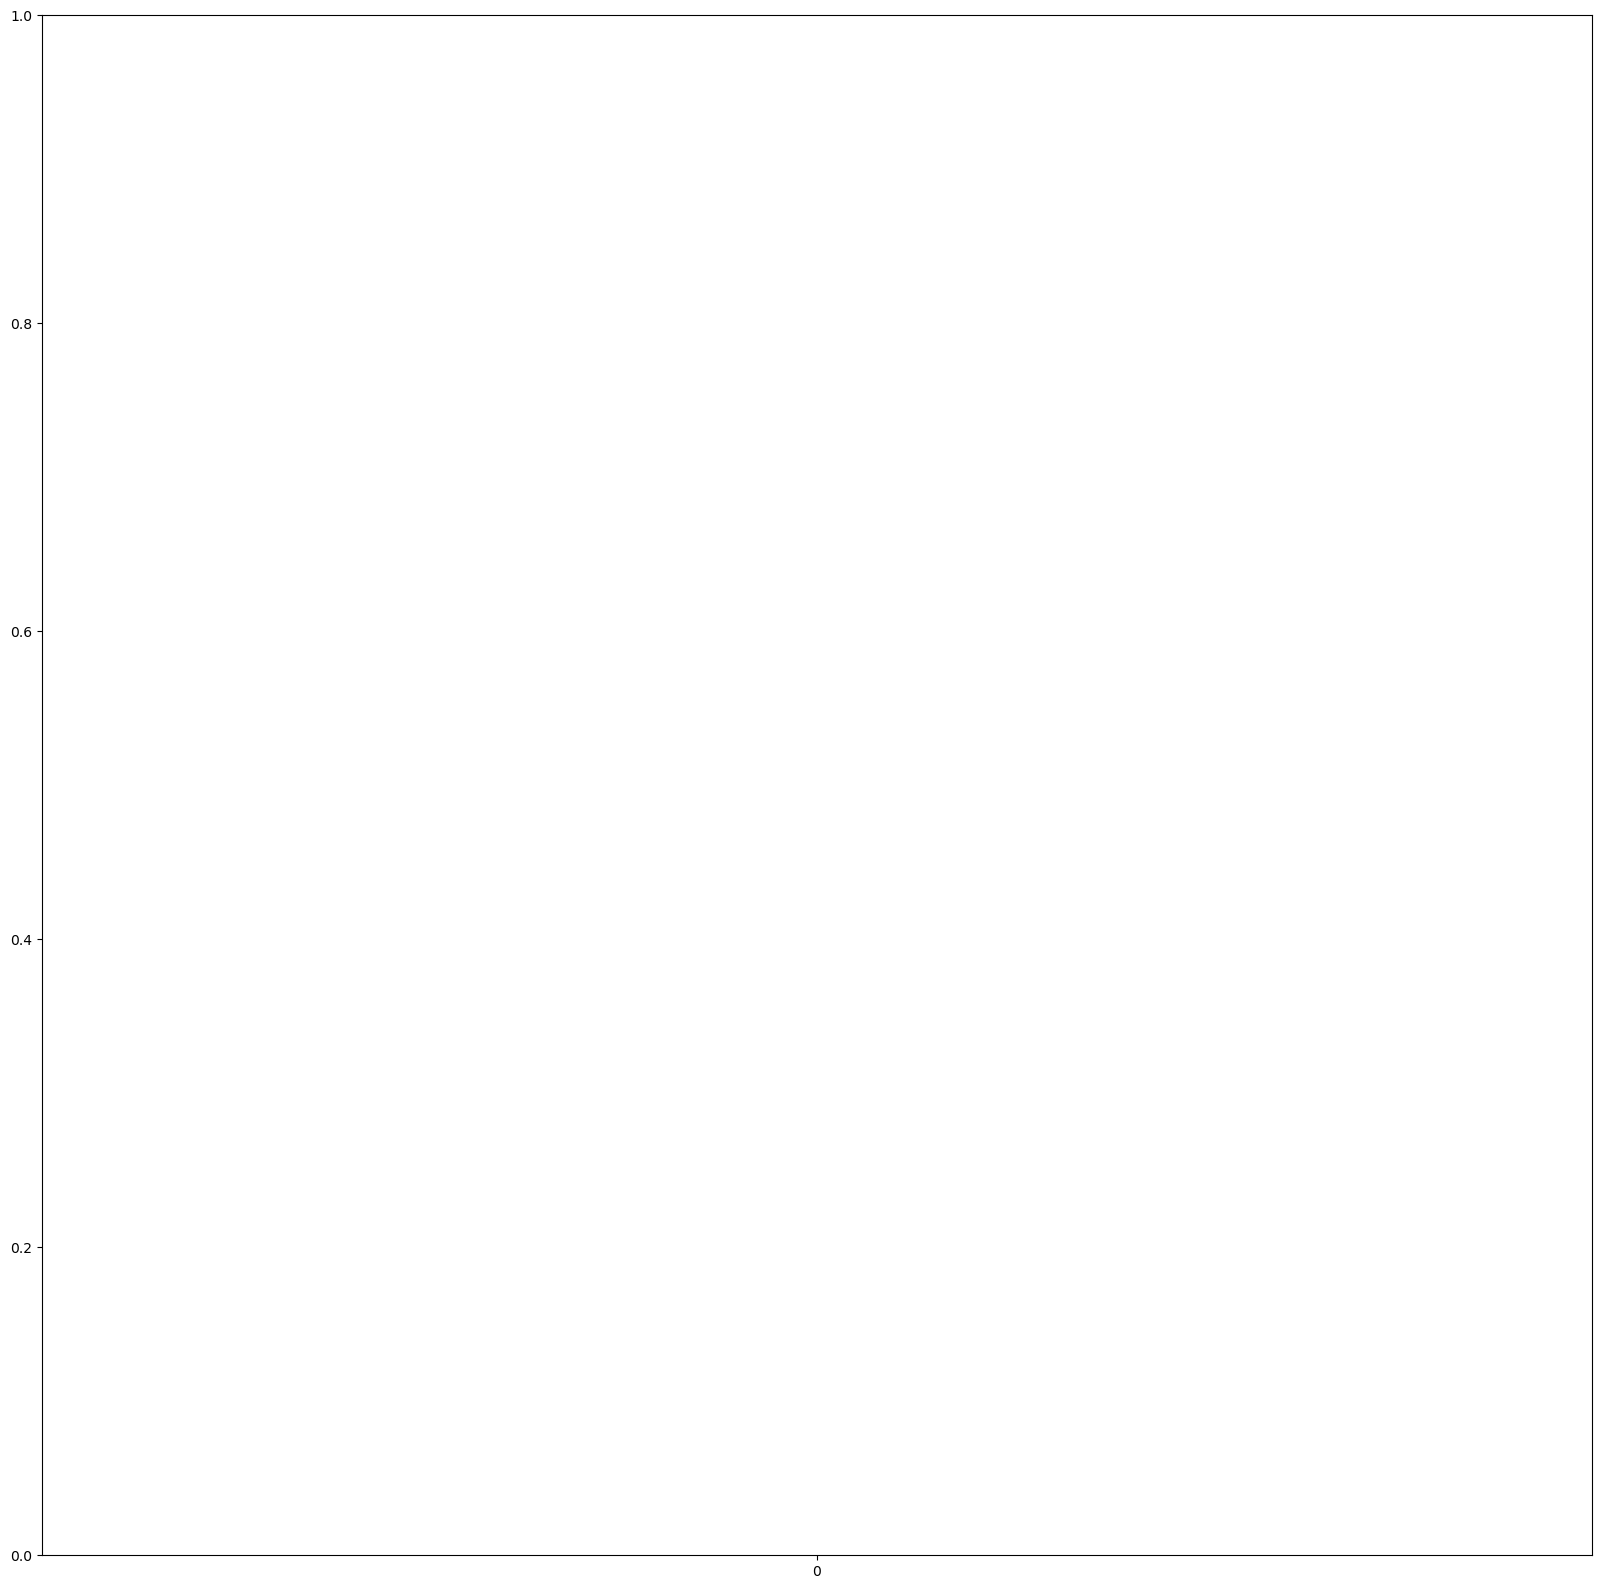

In [25]:
sns.boxplot(Data=df['Product_Category_1'])

In [26]:
df['City_Category'].unique

<bound method Series.unique of 0         A
1         A
2         A
3         A
4         C
         ..
550063    B
550064    C
550065    B
550066    C
550067    B
Name: City_Category, Length: 550068, dtype: object>

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


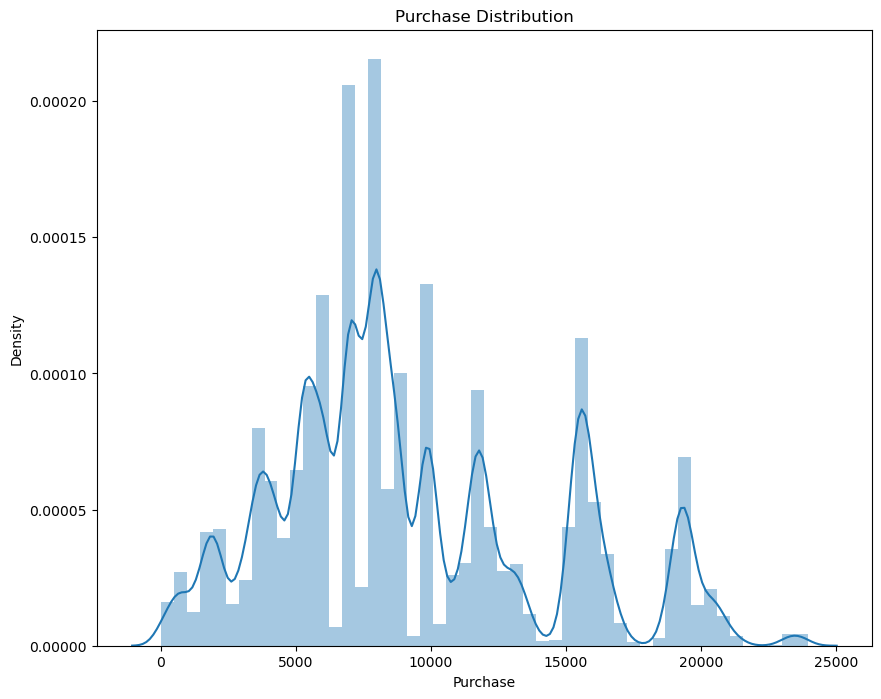

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(df["Purchase"])
plt.title("Purchase Distribution")
plt.show()

In [30]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

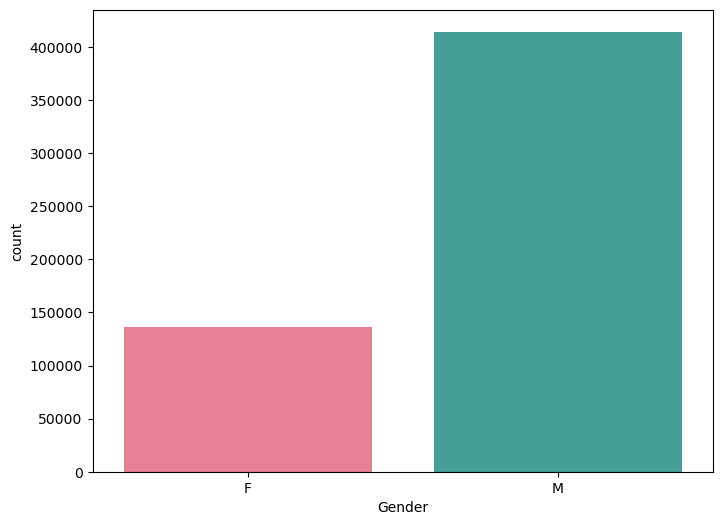

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Gender', data = df, palette ='husl')
plt.show()

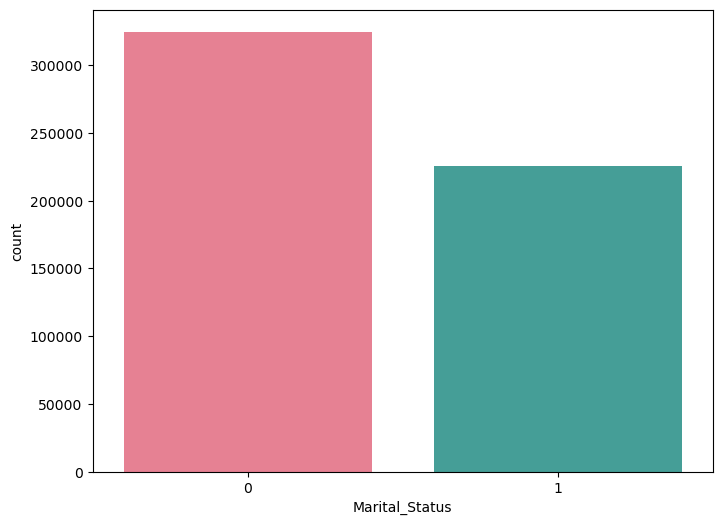

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Marital_Status', data = df, palette ='husl')
plt.show()

In [ ]:
df.groupby("Marital_Status").mean()["Purchase"]

In [27]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.0,14.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,9.0,14.0,1422
3,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,14.0,7969


In [27]:
df.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
Occupation,1.000000,0.024280,-0.007618,0.000557,0.004325
Marital_Status,0.024280,1.000000,0.019888,0.011526,0.012705
Product_Category_1,-0.007618,0.019888,1.000000,0.331691,0.195930
Product_Category_2,0.000557,0.011526,0.331691,1.000000,0.416680
Product_Category_3,0.004325,0.012705,0.195930,0.416680,1.000000


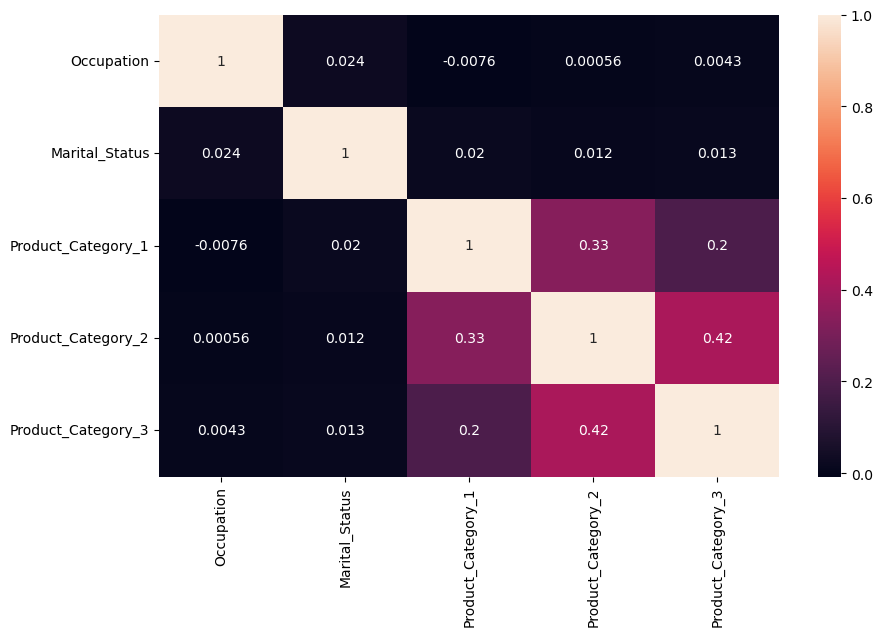

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

# label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [30]:
df['Gender']=LE.fit_transform(df['Gender'])
df['Age']=LE.fit_transform(df['Age'])
df['City_Category']=LE.fit_transform(df['City_Category'])
df['Stay_In_Current_City_Years']=LE.fit_transform(df['Stay_In_Current_City_Years'])
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9.0,14.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,9.0,14.0,1422
3,0,0,10,0,2,0,12,14.0,14.0,1057
4,1,6,16,2,4,0,8,9.0,14.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,9.0,14.0,368
550064,0,2,1,2,3,0,20,9.0,14.0,371
550065,0,2,15,1,4,1,20,9.0,14.0,137
550066,0,6,1,2,2,0,20,9.0,14.0,365


# splitting

In [31]:
X=df.drop('Purchase',axis=1)
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,9.0,14.0
1,0,0,10,0,2,0,1,6.0,14.0
2,0,0,10,0,2,0,12,9.0,14.0
3,0,0,10,0,2,0,12,14.0,14.0
4,1,6,16,2,4,0,8,9.0,14.0


In [32]:
Y= df['Purchase']
Y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: object

# Normalisation 

In [33]:
from sklearn.preprocessing import Normalizer
std = Normalizer()
p = std.fit_transform(X)
print(p)

[[0.         0.         0.50636968 ... 0.15191091 0.45573272 0.70891756]
 [0.         0.         0.54473471 ... 0.05447347 0.32684083 0.76262859]
 [0.         0.         0.43643578 ... 0.52372294 0.3927922  0.61101009]
 ...
 [0.         0.06579517 0.49346377 ... 0.65795169 0.29607826 0.46056619]
 [0.         0.22329688 0.03721615 ... 0.74432293 0.33494532 0.52102605]
 [0.         0.15001172 0.         ... 0.7500586  0.33752637 0.52504102]]


In [34]:
from sklearn.preprocessing import Normalizer
std = Normalizer()
X = pd.DataFrame(std.fit_transform(X), columns= X.columns)

In [35]:
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.000000,0.000000,0.506370,0.000000,0.101274,0.000000,0.151911,0.455733,0.708918
1,0.000000,0.000000,0.544735,0.000000,0.108947,0.000000,0.054473,0.326841,0.762629
2,0.000000,0.000000,0.436436,0.000000,0.087287,0.000000,0.523723,0.392792,0.611010
3,0.000000,0.000000,0.395285,0.000000,0.079057,0.000000,0.474342,0.553399,0.553399
4,0.039103,0.234619,0.625650,0.078206,0.156412,0.000000,0.312825,0.351928,0.547443
...,...,...,...,...,...,...,...,...,...
550063,0.033806,0.169031,0.439480,0.033806,0.033806,0.033806,0.676123,0.304256,0.473286
550064,0.000000,0.075864,0.037932,0.075864,0.113796,0.000000,0.758643,0.341389,0.531050
550065,0.000000,0.065795,0.493464,0.032898,0.131590,0.032898,0.657952,0.296078,0.460566
550066,0.000000,0.223297,0.037216,0.074432,0.074432,0.000000,0.744323,0.334945,0.521026


# training and testing

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=130)
X_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
354780,0.039904,0.119713,0.638470,0.079809,0.159617,0.039904,0.319235,0.359139,0.558661
27942,0.035760,0.107280,0.572159,0.000000,0.000000,0.000000,0.286079,0.572159,0.500639
30906,0.056166,0.168497,0.280828,0.000000,0.112331,0.000000,0.056166,0.505490,0.786318
170170,0.041310,0.123929,0.702264,0.082619,0.082619,0.041310,0.041310,0.371787,0.578335
406015,0.090909,0.363636,0.000000,0.090909,0.090909,0.090909,0.090909,0.545455,0.727273
...,...,...,...,...,...,...,...,...,...
339281,0.053995,0.107990,0.377964,0.000000,0.107990,0.000000,0.269975,0.431959,0.755929
450058,0.000000,0.150376,0.451129,0.050125,0.100251,0.050125,0.250627,0.451129,0.701757
89885,0.053300,0.106600,0.106600,0.053300,0.053300,0.000000,0.426401,0.479702,0.746203
482421,0.051098,0.102195,0.255488,0.051098,0.051098,0.051098,0.051098,0.255488,0.919757


In [37]:
Y_train

354780     9899
27942      7874
30906     15408
170170    12077
406015    19523
          ...  
339281     6904
450058     6901
89885      5964
482421    11521
123289     4673
Name: Purchase, Length: 440054, dtype: object

In [38]:
X_test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
47853,0.059868,0.179605,0.000000,0.119737,0.059868,0.000000,0.119737,0.478947,0.838158
160567,0.059549,0.178647,0.000000,0.000000,0.178647,0.059549,0.059549,0.357295,0.893237
164136,0.000000,0.288675,0.288675,0.144338,0.433013,0.000000,0.144338,0.288675,0.721688
163032,0.054800,0.164399,0.054800,0.109599,0.054800,0.000000,0.273998,0.328798,0.876795
196206,0.040996,0.163984,0.655936,0.081992,0.163984,0.000000,0.204980,0.368964,0.573944
...,...,...,...,...,...,...,...,...,...
212541,0.062378,0.062378,0.249513,0.000000,0.187135,0.000000,0.062378,0.124757,0.935674
231123,0.000000,0.146735,0.048912,0.000000,0.146735,0.048912,0.538028,0.440204,0.684762
170418,0.000000,0.260378,0.694341,0.086793,0.043396,0.043396,0.043396,0.260378,0.607548
188063,0.039498,0.039498,0.671460,0.000000,0.118493,0.000000,0.315981,0.355479,0.552967


In [39]:
Y_test

47853     10143
160567    15187
164136    15335
163032     8813
196206     6995
          ...  
212541    15360
231123     1740
170418    15416
188063     6121
461926     1740
Name: Purchase, Length: 110014, dtype: object

In [40]:
Y_train

354780     9899
27942      7874
30906     15408
170170    12077
406015    19523
          ...  
339281     6904
450058     6901
89885      5964
482421    11521
123289     4673
Name: Purchase, Length: 440054, dtype: object

In [41]:
X_test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
47853,0.059868,0.179605,0.000000,0.119737,0.059868,0.000000,0.119737,0.478947,0.838158
160567,0.059549,0.178647,0.000000,0.000000,0.178647,0.059549,0.059549,0.357295,0.893237
164136,0.000000,0.288675,0.288675,0.144338,0.433013,0.000000,0.144338,0.288675,0.721688
163032,0.054800,0.164399,0.054800,0.109599,0.054800,0.000000,0.273998,0.328798,0.876795
196206,0.040996,0.163984,0.655936,0.081992,0.163984,0.000000,0.204980,0.368964,0.573944
...,...,...,...,...,...,...,...,...,...
212541,0.062378,0.062378,0.249513,0.000000,0.187135,0.000000,0.062378,0.124757,0.935674
231123,0.000000,0.146735,0.048912,0.000000,0.146735,0.048912,0.538028,0.440204,0.684762
170418,0.000000,0.260378,0.694341,0.086793,0.043396,0.043396,0.043396,0.260378,0.607548
188063,0.039498,0.039498,0.671460,0.000000,0.118493,0.000000,0.315981,0.355479,0.552967


In [42]:
Y_test

47853     10143
160567    15187
164136    15335
163032     8813
196206     6995
          ...  
212541    15360
231123     1740
170418    15416
188063     6121
461926     1740
Name: Purchase, Length: 110014, dtype: object

In [43]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)
X_train_std

array([[ 0.0847086 , -0.04912714,  1.06706455, ...,  0.45486629,
        -0.54095888, -0.79045041],
       [-0.07563179, -0.21868624,  0.81311897, ...,  0.24259872,
         0.81060612, -1.24390234],
       [ 0.71382849,  0.61616379, -0.30257142, ..., -1.2293588 ,
         0.38760882,  0.9887372 ],
       ...,
       [ 0.60297044, -0.22795191, -0.96979935, ...,  1.14097032,
         0.22398468,  0.6752242 ],
       [ 0.51775694, -0.28802712, -0.399614  , ..., -1.26180511,
        -1.19860269,  2.03158645],
       [-0.29156444, -0.85859582,  0.93341851, ...,  1.30920321,
         0.24400693, -1.85457242]])

# feature scaling

In [44]:
from sklearn.preprocessing import Normalizer
std = Normalizer()
X = pd.DataFrame(std.fit_transform(X), columns= X.columns)

In [45]:
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.000000,0.000000,0.506370,0.000000,0.101274,0.000000,0.151911,0.455733,0.708918
1,0.000000,0.000000,0.544735,0.000000,0.108947,0.000000,0.054473,0.326841,0.762629
2,0.000000,0.000000,0.436436,0.000000,0.087287,0.000000,0.523723,0.392792,0.611010
3,0.000000,0.000000,0.395285,0.000000,0.079057,0.000000,0.474342,0.553399,0.553399
4,0.039103,0.234619,0.625650,0.078206,0.156412,0.000000,0.312825,0.351928,0.547443
...,...,...,...,...,...,...,...,...,...
550063,0.033806,0.169031,0.439480,0.033806,0.033806,0.033806,0.676123,0.304256,0.473286
550064,0.000000,0.075864,0.037932,0.075864,0.113796,0.000000,0.758643,0.341389,0.531050
550065,0.000000,0.065795,0.493464,0.032898,0.131590,0.032898,0.657952,0.296078,0.460566
550066,0.000000,0.223297,0.037216,0.074432,0.074432,0.000000,0.744323,0.334945,0.521026


# KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200)#hyperparameter k = 5
knn.fit(X_train,Y_train)#training of the model

KNeighborsClassifier(n_neighbors=200)

In [47]:
Y_pred = knn.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(Y_test, Y_pred)
print('The accuracy score of kn is: ',acc1)

The accuracy score of kn is:  0.0008453469558419838


In [49]:
Y_pred1 = knn.predict(X_train)

In [50]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(Y_train, Y_pred1)
print('The accuracy score of kn is: ',acc2)

The accuracy score of kn is:  0.012518918132774615


# KNN Regressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [52]:
knn = KNeighborsRegressor()

In [53]:
Grid_param = {'n_neighbors':range(1,20),'weights':['uniform', 'distance'],
 'metric':['minkowski','eculidean','manhanttan','hamming'],
 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [ ]:
grid_search = GridSearchCV(knn,Grid_param,n_jobs=-1,cv=10,scoring='neg_mean_squared_error')
grid_search.fit(X_train,Y_train)

# linear regression

In [219]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [220]:
Y_pred = regressor.predict(X_test_std)
Y_pred

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12473.6352845 , 11582.57633373, 11040.0644526 , ...,
       11593.23800284, 10766.67926126, 10326.3453638 ])

In [221]:
Y_test

47853     10143
160567    15187
164136    15335
163032     8813
196206     6995
          ...  
212541    15360
231123     1740
170418    15416
188063     6121
461926     1740
Name: Purchase, Length: 110014, dtype: int64

In [222]:
residuals=Y_test-Y_pred
residuals

47853    -2330.635284
160567    3604.423666
164136    4294.935547
163032   -3347.057743
196206   -5262.435174
             ...     
212541    3788.780860
231123   -7578.541591
170418    3822.761997
188063   -4645.679261
461926   -8586.345364
Name: Purchase, Length: 110014, dtype: float64

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

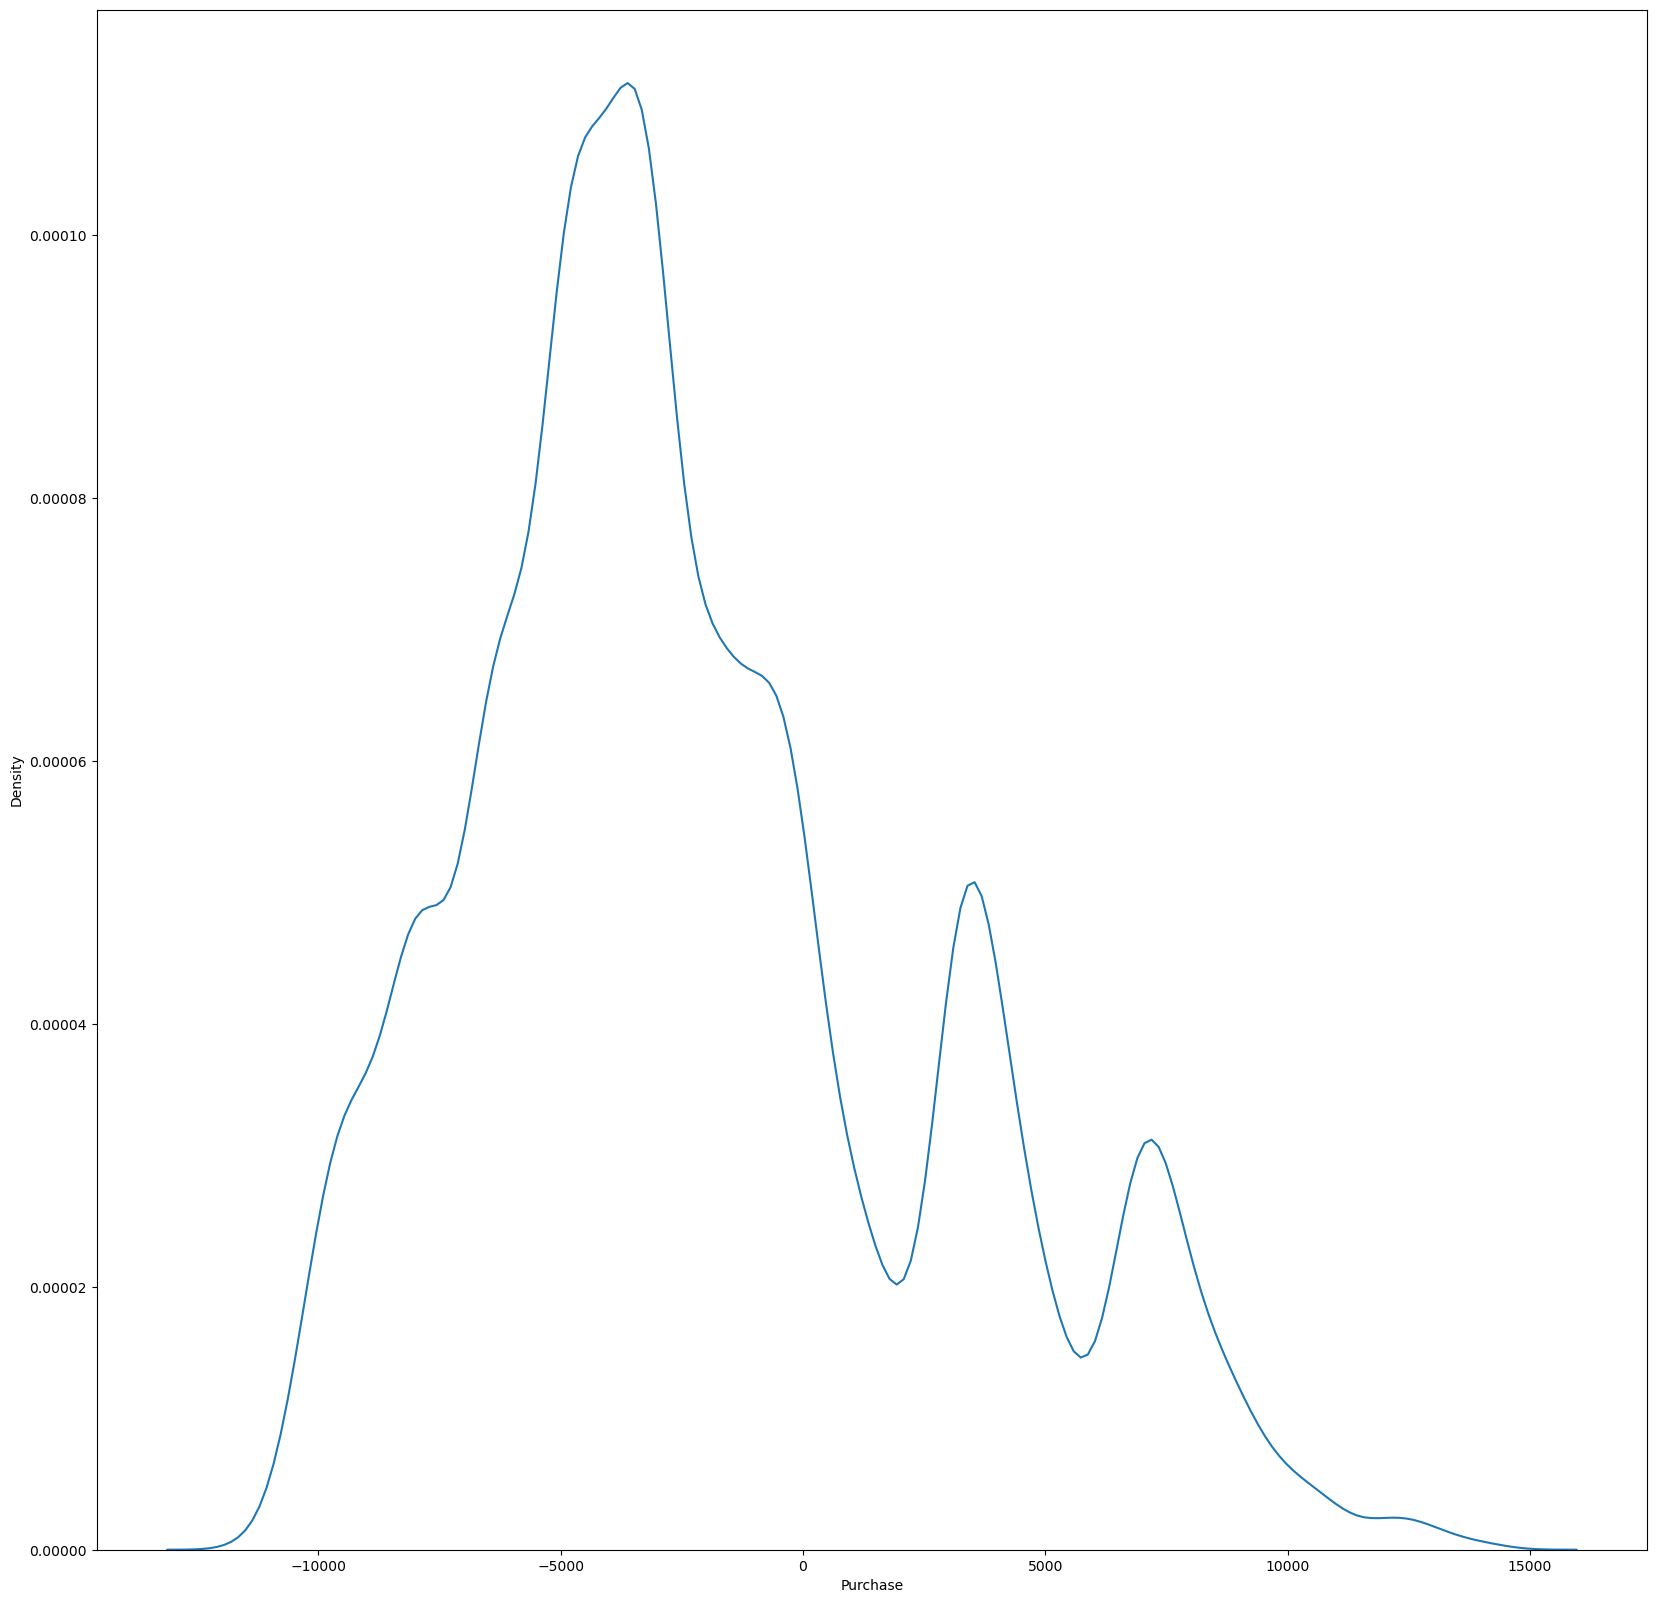

In [223]:
sns.kdeplot(residuals,)

In [224]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
r2_score(Y_test,Y_pred)

-0.10497668281144557

In [225]:
mean_absolute_error(Y_test, Y_pred)

4529.618929631056

In [226]:
mean_squared_error(Y_test, Y_pred)

27846726.50960246

In [227]:
from math import sqrt
print("RMSE of Linear Regression Model on test data is ",sqrt(mean_squared_error(Y_test, Y_pred)))

RMSE of Linear Regression Model on test data is  5276.999764032822


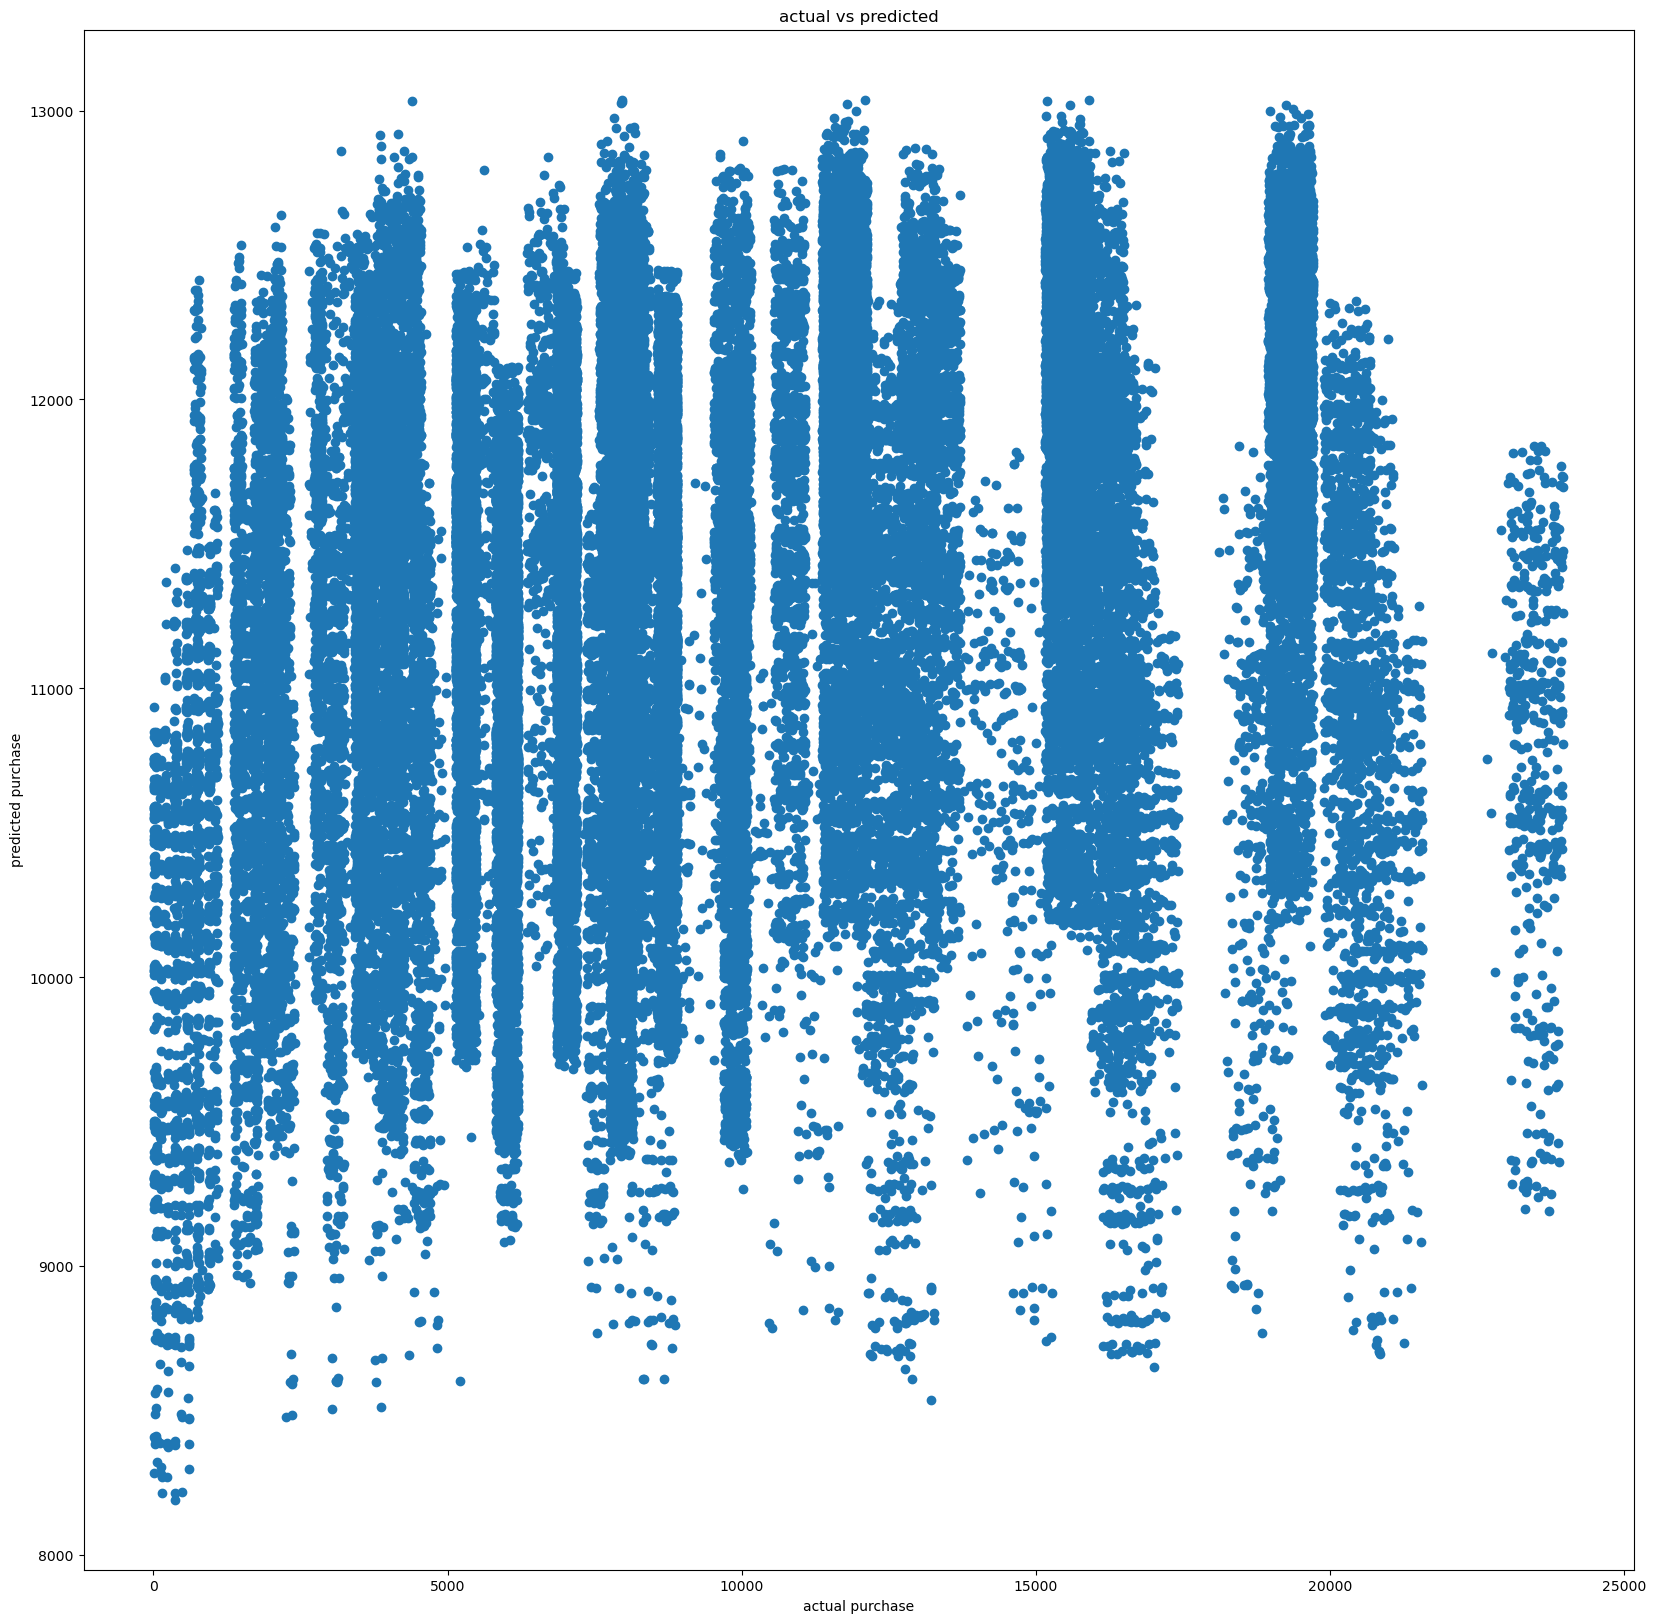

In [228]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual purchase')
plt.ylabel('predicted purchase')
plt.title('actual vs predicted')
plt.show()

# KNN

In [229]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor()
KNR.fit(X_train,Y_train)

KNeighborsRegressor()

In [230]:
Y_pred1=KNR.predict(X_test)
Y_pred1

array([12157. , 16990.6, 15687. , ..., 14076.8,  9556.8,  6015.8])

In [233]:
Y_test

47853     10143
160567    15187
164136    15335
163032     8813
196206     6995
          ...  
212541    15360
231123     1740
170418    15416
188063     6121
461926     1740
Name: Purchase, Length: 110014, dtype: int64

In [234]:
r2_score(Y_test,Y_pred1)

0.5902911487378109

In [235]:
mean_absolute_error(Y_test, Y_pred1)

2347.085778173687

In [236]:
mean_squared_error(Y_test, Y_pred1)

10325150.301482357

In [237]:
print("RMSE of KNN Model on test data is ",sqrt(mean_squared_error(Y_test, Y_pred1)))

RMSE of KNN Model on test data is  3213.277190265782


In [ ]:
rmse_error = []
for k in range(1,50):
 model = KNeighborsRegressor(n_neighbors=k)
 model.fit(X_train,Y_train)
 predx = model.predict(X_test)
 error = np.sqrt(mean_squared_error(Y_test,predx))
 rmse_error.append(error)
 print('Error value for K is: ', k, error)

In [ ]:
plot1 = pd.DataFrame(rmse_error)
plot1.plot()

# decision tree regressor

In [240]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state = 0)

In [127]:
dt.fit(X_train_std, Y_train)

DecisionTreeRegressor(random_state=0)

In [128]:
dt_Y_pred = dt.predict(X_test_std)
dt_Y_pred

array([ 9631., 15803.,  7961., ..., 11588.,  6145.,  5339.])

In [129]:
r2_score(Y_test, dt_Y_pred)

0.42380437285889005

In [130]:
mean_absolute_error(Y_test, dt_Y_pred)

2676.641826386598

In [131]:
mean_squared_error(Y_test, dt_Y_pred)

14520815.049420664

In [132]:
print("RMSE of Decision Tree Model on test data is ",sqrt(mean_squared_error(Y_test, dt_Y_pred)))

RMSE of Decision Tree Model on test data is  3810.6187226513052


# Random forest regressor

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
rf= RandomForestRegressor(n_estimators = 10, random_state = 0)

In [135]:
rf.fit(X_train_std, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [136]:
rf_Y_pred = rf.predict(X_test_std)
rf_Y_pred

array([11480.3, 11916.6,  9104.5, ..., 14415. ,  7590.8,  5271.9])

In [137]:
r2_score(Y_test, rf_Y_pred)

0.6733813001550233

In [138]:
mean_absolute_error(Y_test,rf_Y_pred)

2111.8191049681704

In [139]:
mean_squared_error(Y_test, rf_Y_pred)

8231179.67011167

In [140]:
# Root mean square error
print("RMSE of Random Forest Model on test data is ",sqrt(mean_squared_error(Y_test, rf_Y_pred)))

RMSE of Random Forest Model on test data is  2869.0032537645666


# logistic  regression

In [141]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [142]:
X = data.drop(['Purchase'], axis=1)
Y = data['Purchase']

In [143]:
imb = SMOTETomek(random_state=12)
X,Y = imb.fit_resample(X,Y)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 6